In [14]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_pickle("./songs_embeddings.pkl")
rap_df = pd.read_pickle("./rap_songs_embeddings.pkl")
df = pd.concat([df, rap_df])
df = df.reset_index()
df.shape

(1049, 5)

In [9]:
df.head()

index                                           filename  \
0      0          data/guess-the-song/ACDC/Little Lover.mp3   
1      1  data/guess-the-song/ACDC/Can I Sit Next to You...   
2      2          data/guess-the-song/ACDC/Shot of Love.mp3   
3      3      data/guess-the-song/ACDC/Cover You in Oil.mp3   
4      4     data/guess-the-song/ACDC/Whole Lotta Rosie.mp3   

                                           embedding  band  \
0  [tensor(36.4139), tensor(15.8792), tensor(4.02...  ACDC   
1  [tensor(16.5327), tensor(6.2954), tensor(-17.5...  ACDC   
2  [tensor(33.0472), tensor(19.0865), tensor(-16....  ACDC   
3  [tensor(40.7268), tensor(17.6238), tensor(0.21...  ACDC   
4  [tensor(-12.3743), tensor(15.9797), tensor(-41...  ACDC   

                             song  
0                Little Lover.mp3  
1  Can I Sit Next to You Girl.mp3  
2                Shot of Love.mp3  
3            Cover You in Oil.mp3  
4           Whole Lotta Rosie.mp3

In [10]:
df["band"].value_counts()

ACDC              158
Iron Maiden       152
Metallica         121
Eminem            108
Wiz Khalifa        96
Kendrick Lamar     88
Future             81
ScHoolboy Q        76
Guns N' Roses      75
A$AP Rocky         65
Van Halen          29
Name: band, dtype: int64

In [3]:
df["embedding"].iloc[0]

tensor([ 36.4139,  15.8792,   4.0266,   3.1060,  12.7445, -25.6868,   7.6406,
        -12.9760,   6.9738,  -1.4144,  10.0780,  10.4560,   6.4751,  22.1516,
          8.1429,  18.8748,  43.6336,  23.0031, -14.7809,  -2.9230, -16.3699,
          4.3921, -20.5686,  30.9510,   2.6578,  -0.2956, -11.4967, -15.4305,
         10.4362,  14.0074,  11.1146, -10.6203, -13.6990,  -5.9979, -12.9163,
         -4.4254,  -1.1783, -17.7542,  22.1494,  38.9478, -39.1092,  20.5656,
         11.2265, -22.2277,  21.1088,   4.3378,  -2.6582,  -9.3925,  19.7452,
          3.3721, -14.5870, -21.9354,   1.0571,  13.6078,  -1.9429,  -1.2606,
        -24.8978,  -9.4006,  -1.2352, -12.3088,  21.9680,   2.3214, -54.6720,
         23.1997, -26.8171,   2.2340,   1.0002,  -0.6238,  14.3429, -19.5310,
         -1.4852,  11.8091, -10.4306, -26.6321,   1.5025,   1.4025, -13.8286,
          2.8101,  10.6021,  20.1825,  28.3315,   2.9642,   0.9142,  -3.5262,
          2.1804,  18.5743,  29.2237,  -0.6137, -25.4132,  21.68

In [11]:
X = [i.unsqueeze(0) for i in df["embedding"]]
X = torch.vstack(X)
X.shape

torch.Size([1049, 192])

In [16]:
# X = np.array(df["embedding"])
label = "band"
y = df[label]
# X = np.vstack(X)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', metric="cosine")
X_2d = tsne.fit_transform(X)

/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.

/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [6]:
# from sklearn.preprocessing import LabelEncoder

# # df = pd.DataFrame({
# # 'colors':  ["R" ,"G", "B" ,"B" ,"G" ,"R" ,"B" ,"G" ,"G" ,"R" ,"G" ],
# # 'skills':  ["Java" , "C++", "SQL", "Java", "Python", "Python", "SQL","C++", "Java", "SQL", "Java"]
# # })

# transform_columns = ["band"]

# le = LabelEncoder()

# for column in transform_columns:
#     df[column] = le.fit_transform(df[column])

# df

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0         ACDC
1         ACDC
2         ACDC
3         ACDC
4         ACDC
         ...  
1044    Future
1045    Future
1046    Future
1047    Future
1048    Future
Name: band, Length: 1049, dtype: object

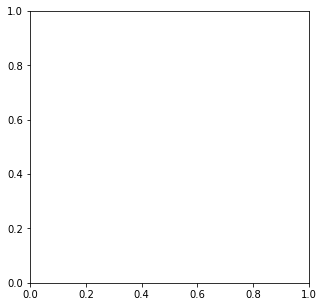

In [17]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
plt.scatter(*X_2d.T, c=df[label])

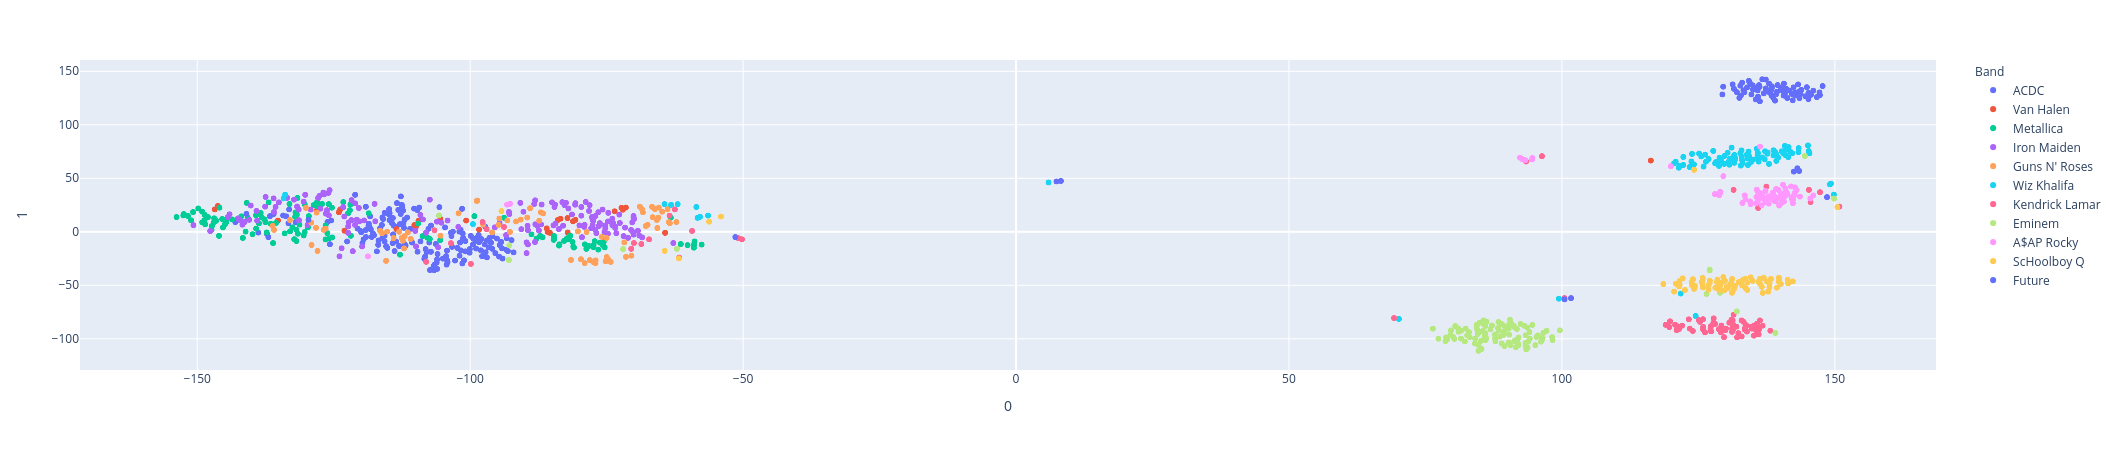

In [18]:
import plotly.express as px


fig = px.scatter(
    X_2d, x=0, y=1,
    color=df[label], labels={'color': 'Band'},
)
fig.show()

3d

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, init='pca', metric="cosine")
X_3d = tsne.fit_transform(X)
X_3d

/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.

/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



array([[ -86.38008 ,   13.754115,  -61.219795],
       [-133.97954 ,   10.175572,  -67.124115],
       [-103.84825 ,  -13.560356,   60.830307],
       ...,
       [ 158.03078 ,  123.32823 ,  -84.727806],
       [ 170.22374 ,  154.97964 , -100.24812 ],
       [ 122.87676 ,  112.26782 , -124.24792 ]], dtype=float32)

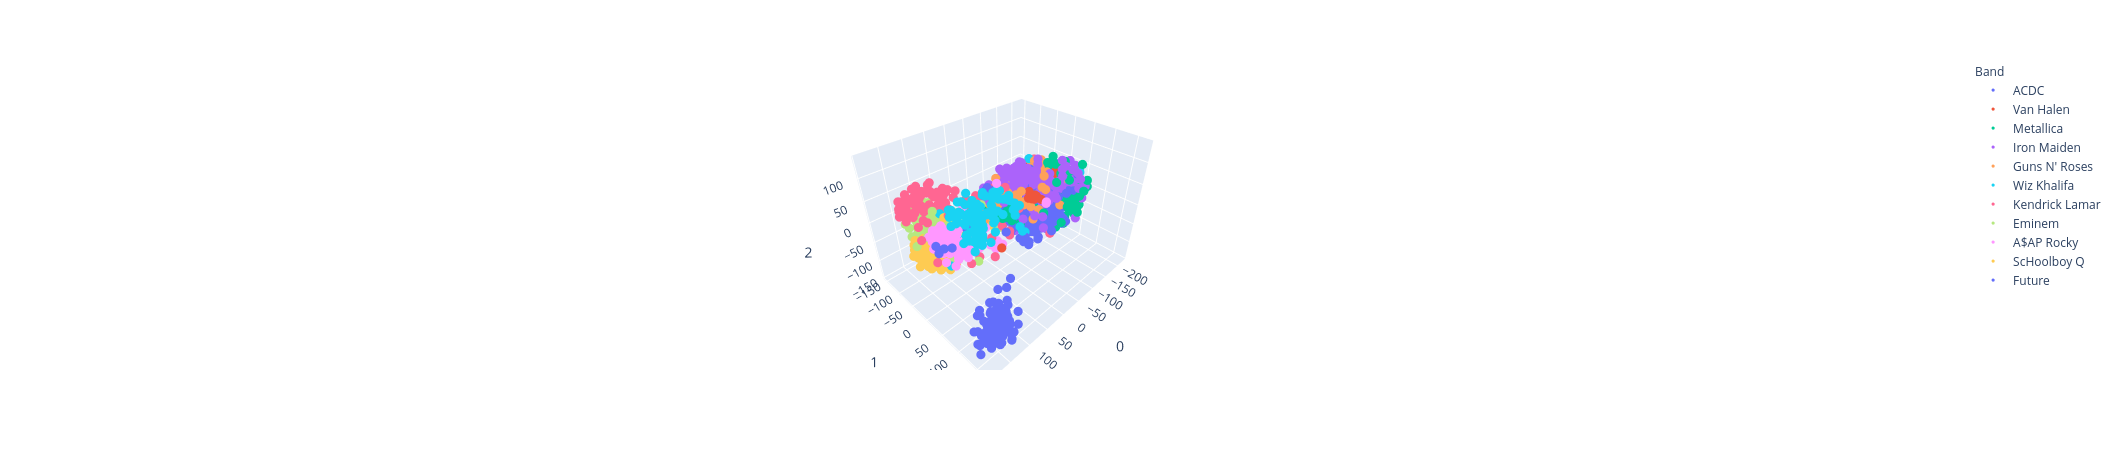

In [20]:
fig = px.scatter_3d(
    X_3d, x=0, y=1, z=2,
    color=df[label], labels={'color': 'Band'},
)
fig.update_traces(marker_size=3)

fig.show()

In [21]:
df["embedding"].apply(lambda x: x.detach().cpu().numpy())

0       [36.41387, 15.879176, 4.0265784, 3.10599, 12.7...
1       [16.532713, 6.2954493, -17.592627, -1.1641021,...
2       [33.047234, 19.086462, -16.69857, -11.03282, 2...
3       [40.72679, 17.623814, 0.21260652, 0.9691405, 1...
4       [-12.37428, 15.979737, -41.552444, -13.281921,...
                              ...                        
1044    [0.3800395, -14.012614, 3.3932714, -7.1526513,...
1045    [21.808426, -14.800252, -3.0647087, 11.21343, ...
1046    [0.35996276, -29.311115, -2.2886953, 5.0018134...
1047    [34.056072, -29.205421, -7.837245, -23.495682,...
1048    [20.905075, -15.380686, 10.387826, -7.7649674,...
Name: embedding, Length: 1049, dtype: object

In [22]:
# df["embedding"].apply(lambda x: x.shape).unique()
X = np.vstack(df["embedding"])
X

array([[ 3.6413872e+01,  1.5879176e+01,  4.0265784e+00, ...,
         8.6004143e+00,  4.5497370e+00,  6.3825049e+00],
       [ 1.6532713e+01,  6.2954493e+00, -1.7592627e+01, ...,
        -2.6640232e+00, -2.9330184e+00, -3.8943396e+00],
       [ 3.3047234e+01,  1.9086462e+01, -1.6698570e+01, ...,
         1.8027784e+01,  2.8876340e+00,  2.0725403e-02],
       ...,
       [ 3.5996276e-01, -2.9311115e+01, -2.2886953e+00, ...,
        -1.4192311e+00,  2.7641872e+01, -2.4126123e+01],
       [ 3.4056072e+01, -2.9205421e+01, -7.8372450e+00, ...,
        -6.2368917e+00,  1.5302004e+01, -3.8584736e+01],
       [ 2.0905075e+01, -1.5380686e+01,  1.0387826e+01, ...,
         5.4676619e+00,  3.6951671e+00, -3.1814835e+01]], dtype=float32)

In [23]:
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(X)

/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1049 samples in 0.001s...
[t-SNE] Computed neighbors for 1049 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1049
[t-SNE] Computed conditional probabilities for sample 1049 / 1049
[t-SNE] Mean sigma: 59.506118
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.894371
[t-SNE] KL divergence after 1000 iterations: 0.960786


In [24]:
df["band"].unique().size

11

In [25]:
df[label]

0         ACDC
1         ACDC
2         ACDC
3         ACDC
4         ACDC
         ...  
1044    Future
1045    Future
1046    Future
1047    Future
1048    Future
Name: band, Length: 1049, dtype: object

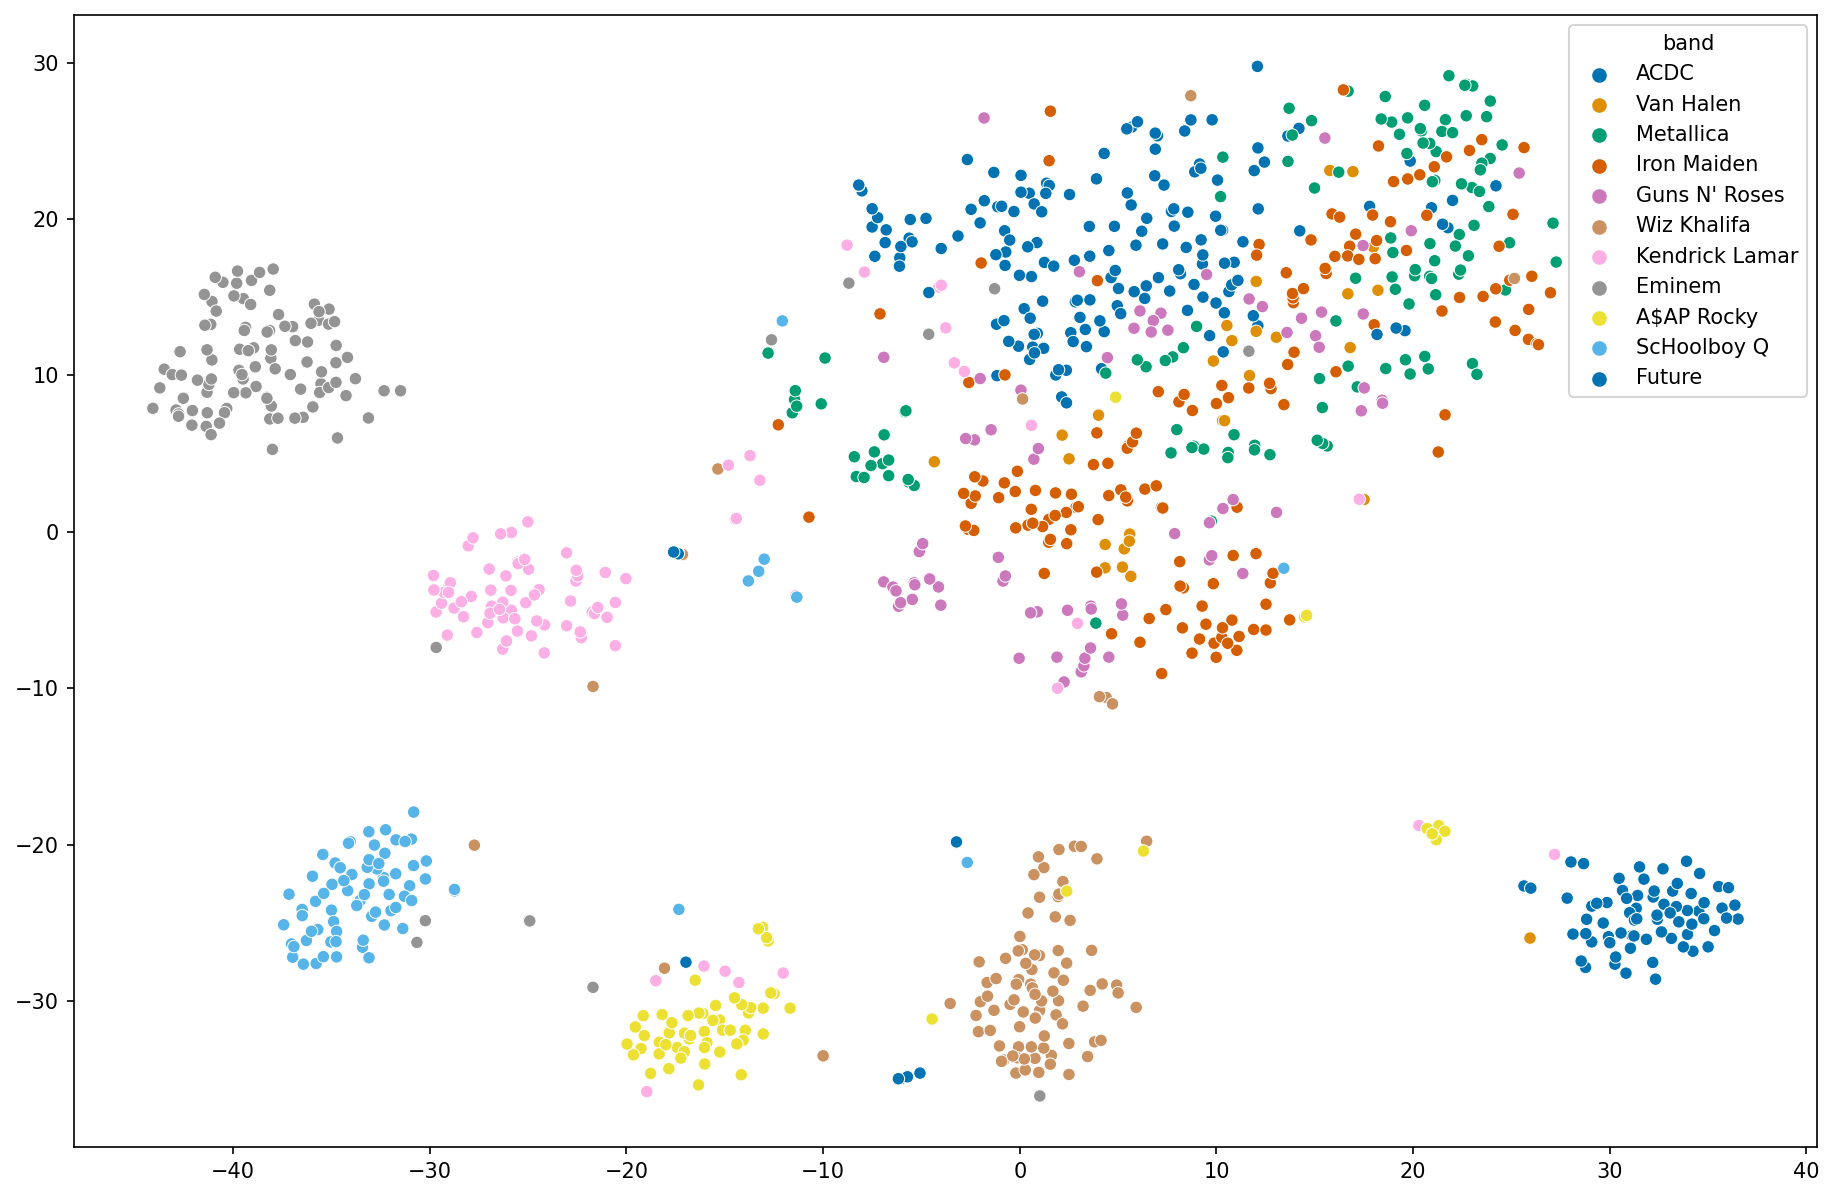

In [29]:
import seaborn as sns

plt.figure(dpi=150, figsize=(15, 10))
sns.scatterplot(x=tsne_proj[:, 0], y=tsne_proj[:, 1], hue=df[label], 
                legend="full", palette=sns.color_palette("colorblind", df[label].unique().size))
plt.savefig("tsne_bands.png", dpi=120)